In [1]:
### Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 

In [2]:
### Load in Stock Data
tickers = ['GOOG', 'AAPL']
start_date = '2018-01-01'

def import_stock_data(tickers, start_date):
    # Check if tickers is a list or a single ticker string
    if isinstance(tickers, list):
        data = yf.download(tickers, start=start_date)[['Close', 'High', 'Low']]
    else:
        data = yf.download(tickers, start=start_date)[['Close', 'High', 'Low']]
        data = pd.DataFrame(data)

    # Reset index to make 'Date' a column instead of index
    data.reset_index(inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])

    return data

stock_data = import_stock_data(tickers, start_date)
stock_data

[*********************100%%**********************]  2 of 2 completed


Price        Date       Close                    High                     Low  \
Ticker                   AAPL        GOOG        AAPL        GOOG        AAPL   
0      2018-01-02   43.064999   53.250000   43.075001   53.347000   42.314999   
1      2018-01-03   43.057499   54.124001   43.637501   54.314499   42.990002   
2      2018-01-04   43.257500   54.320000   43.367500   54.678501   43.020000   
3      2018-01-05   43.750000   55.111500   43.842499   55.212502   43.262501   
4      2018-01-08   43.587502   55.347000   43.902500   55.563499   43.482498   
...           ...         ...         ...         ...         ...         ...   
1581   2024-04-16  169.380005  156.000000  173.759995  157.229996  168.270004   
1582   2024-04-17  168.000000  156.880005  170.649994  158.681000  168.000000   
1583   2024-04-18  167.039993  157.460007  168.639999  158.485001  166.550003   
1584   2024-04-19  165.000000  155.720001  166.399994  157.990005  164.080002   
1585   2024-04-22  165.839996  157.949997  167.259995  159.184998  164.770004   

Price               
Ticker        GOOG  
0        52.261501  
1        53.160500  
2        54.200100  
3        54.599998  
4        55.081001  
...            ...  
1581    155.050003  
1582    156.134995  
1583    156.210007  
1584    153.910004  
1585    155.660004  

[1586 rows x 7 columns]

In [3]:
### Function to Calculate CCI
def calculate_cci(df, window):
    # empty list init
    cci_last_row = []

    # Calculate Typical Price (TP) = (High + Low + Close) / 3
    typ_price = (df['High'] + df['Low'] + df['Close']) / 3 
    # Simple Moving Average (SMA) of TP
    sma = typ_price.rolling(window = window).mean()  
    # Mean Deviation (MD) = absolute difference between the TP and the SMA
    mean_dev = (typ_price - sma).abs().rolling(window=window).mean()  
    # Calculate Commodity Channel Index (CCI) = (TP - SMA) / (0.015 * MD)
    cci = (typ_price - sma) / (0.015 * mean_dev)
    
    # Append last two row values to cci_vals list
    cci_last_row.extend(cci.iloc[-1:].values)
    # extract just the final row of values
    cci_vals = np.array(cci_last_row[0])

    return cci, cci_vals

cci, cci_vals = calculate_cci(stock_data, window=20)
print(cci.tail(5))
print("CCI values list: ", cci_vals)

Ticker        AAPL       GOOG
1581    -29.561464  17.629389
1582    -63.534586  24.449970
1583    -87.033725  23.007905
1584   -128.386860   6.049671
1585    -99.261369  21.564724
CCI values list:  [-99.26136881  21.56472358]


NameError: name 't' is not defined

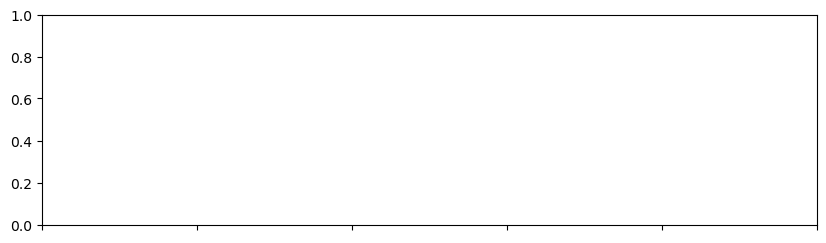

In [4]:
### Plot CCI
# Convert 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Filter stock_data and mult_adx based on start_date
start_date = pd.Timestamp('2024-01-01')  # Assuming start_date is '2024-01-01'
filtered_stock_data = stock_data[stock_data['Date'] >= start_date]
filtered_mult_adx = cci[cci.index.isin(filtered_stock_data.index)]

# Plot Stocks Analyzed
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(filtered_stock_data['Date'], filtered_stock_data['Close'], lw = 1, label = tickers)
plt.title('Stock Price Chart')
plt.ylabel('Close Price')
plt.xlabel('Dates')
plt.grid(True)

# Add ADX Subplot
bx = fig.add_subplot(2, 1, 2)
for t in mult_tick_list:
    plt.plot(filtered_stock_data['Date'], filtered_mult_adx[t], lw = 1, label = t)
plt.title('ADX Values')
plt.legend(loc=2, prop={'size': 9.5})
plt.ylabel('Calculated ADX')
plt.xlabel('Dates')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.tight_layout()
plt.show()
